In [1]:
# with open('./GX/pcNet.py') as pcNet:
#     exec(pcNet.read())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
from anndata import AnnData
import scipy
from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [3]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from pcNet import pcNet
    from main import *
    import dNN 
    from neighborhood import laplacian
except ImportError:
    print('Module not found')

In [4]:
ada = sc.read_h5ad("data/LS.h5ad")
ada

AnnData object with n_obs × n_vars = 5011 × 17328
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [5]:
data = scipy.sparse.csr_matrix.toarray(ada.X)
counts = np.asarray(np.expm1(data), dtype=int)
ada.layers['raw'] = counts
ada.layers['log1p'] = data

In [6]:
#ada.X = ada.layers['log1p']

In [7]:
#sc.pp.highly_variable_genes(ada, n_top_genes=3000, flavor='seurat_v3')

In [8]:
ada.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
A1BG,0.207945,0.433392,0.416993,1.039327,0
A1BG-AS1,0.016780,0.034014,0.035630,0.954655,0
A2M,0.076039,0.197688,0.158364,1.248312,1
A2M-AS1,0.006253,0.015517,0.013463,1.152493,1
A2ML1,0.001538,0.004003,0.003239,1.236025,1


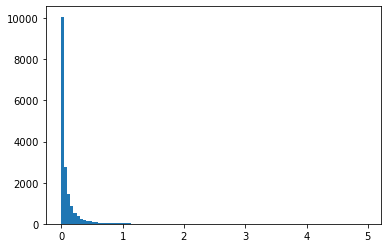

In [9]:
plt.hist(ada.var['vst.mean'], bins=100, density=False)
plt.show()

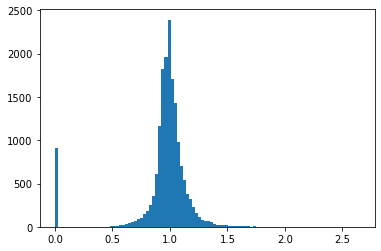

In [10]:
plt.hist(ada.var['vst.variance.standardized'], bins=100, density=False)
plt.show()

### HVG: Seurat v3

In [11]:
HVG_i = np.argsort(np.asarray(ada.var['vst.variance.standardized']))[-3000:]
ada = ada[:, HVG_i].copy()
ada

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'raw', 'log1p'

In [12]:
ada.var.head()

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable
FAM89A,0.017362,0.039930,0.036858,1.083349,1
BCL2L15,0.002309,0.005352,0.004940,1.083378,1
NABP1,0.430442,0.881347,0.813464,1.083449,1
SPTBN1,0.480740,0.971483,0.896650,1.083459,1
SNHG9,0.199078,0.433404,0.400012,1.083478,1


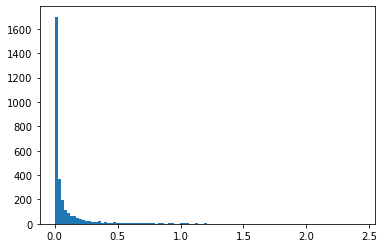

In [13]:
plt.hist(ada.var['vst.mean'], bins=100, density=False)
plt.show()

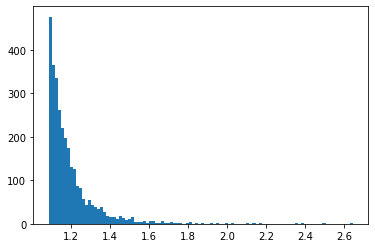

In [14]:
plt.hist(ada.var['vst.variance.standardized'], bins=100, density=False)
plt.show()

### Xct object

In [15]:
skin = Xct_metrics(ada)
type(skin)

main.Xct_metrics

In [16]:
skin.DB.head()

,ligand,receptor
0,BDNF,TRPC1
1,CXCL12,GNAI2
2,PF4,GNAI2
3,EPOR,TRPC3
4,EPOR,EPO


In [17]:
skin._genes_index_DB

array([[1194,    0],
       [2920,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

918 (intervals for fit) / 3000 (filtered -Inf) / 3000 (original) features for the fit


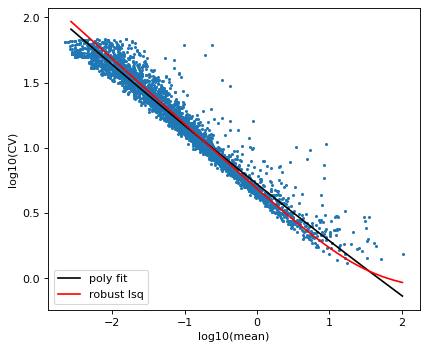

array([ 0.048889  , -0.07626458, -0.02784309, ...,  0.78019458,
        0.59314723,  0.22144539])

In [18]:
skin.chen2016_fit(ada, plot = True, verbose = True)

In [19]:
obj1 = Xct(ada, 'Inflam. FIB', 'Inflam. DC')
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
21,IGF1,NTRK2,0.029522,0.024446,0.067410,0.027285,2.283343,1.116142,8.794479,6.757026,0.156436,-0.338065
31,AREG,NTRK2,0.003443,0.024446,0.005726,0.027285,1.663072,1.116142,21.977261,6.757026,-0.221117,-0.338065
36,FGF2,NTRK2,0.076530,0.024446,0.142827,0.027285,1.866276,1.116142,4.938230,6.757026,-0.075862,-0.338065
38,FGF7,NTRK2,0.449156,0.024446,0.835224,0.027285,1.859543,1.116142,2.034720,6.757026,0.023099,-0.338065
56,BDNF,NTRK2,0.009386,0.024446,0.016305,0.027285,1.737234,1.116142,13.604940,6.757026,-0.094830,-0.338065
...,...,...,...,...,...,...,...,...,...,...,...,...
7974,LAMB1,SV2B,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
7980,LAMC3,SV2B,0.343355,0.015761,0.610706,0.019873,1.778645,1.260899,2.276004,8.944272,-0.046932,-0.338065
7984,LAMB2,SV2B,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065
8113,FSTL1,DIP2A,1.154967,0.066773,1.490066,0.086209,1.290138,1.291068,1.056898,4.397163,0.014484,-0.313400


In [20]:
candidates = [a+'_'+b for a, b in zip(np.asarray(df1['ligand'],dtype=str), np.asarray(df1['receptor'],dtype=str))]
len(candidates)

160

In [21]:
dir(obj1) #check attributes

['DB',
 'Xct_DB',
 '_CellA',
 '_CellB',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_genes_index_DB',
 '_metric_A',
 '_metric_B',
 '_metric_names',
 'chen2016_fit',
 'fill_metric',
 'genes',
 'genes_index',
 'get_index',
 'get_metric',
 'ref',
 'score',
 'subset']

In [22]:
obj1.genes_index[:10, :]

array([[2777,   58],
       [2808,   58],
       [ 302,   58],
       [2078,   58],
       [1194,   58],
       [ 826,   58],
       [1455, 2695],
       [2997, 1857],
       [2963, 1857],
       [2086, 1857]])

In [23]:
ada.var_names[2776], ada.var_names[57]

('IGF1', 'NTRK2')

In [24]:
obj1.score(method=0)

21      0.016969
31      0.002009
36      0.042831
38      0.207997
56      0.005458
          ...   
7974    0.067796
7980    0.114603
7984    0.279132
8113    0.648454
8132    0.061089
Length: 160, dtype: float64

In [25]:
temp = ada.copy()
labels_pmt = np.random.permutation(temp.obs['ident']) 
temp.obs['ident'] = labels_pmt

obj_pmt = Xct(temp, 'Inflam. FIB', 'Inflam. DC', pmt=True)
df_pmt = obj_pmt.fill_metric(ref_obj = obj1)
df_pmt

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
21,IGF1,NTRK2,0.145348,0.554738,0.418965,1.175696,2.882502,2.119373,4.453289,1.954608,0.180748,0.017770
31,AREG,NTRK2,0.184175,0.554738,0.529058,1.175696,2.872576,2.119373,3.949298,1.954608,0.412912,0.017770
36,FGF2,NTRK2,0.013662,0.554738,0.029307,1.175696,2.145135,2.119373,12.530489,1.954608,0.029819,0.017770
38,FGF7,NTRK2,0.531301,0.554738,1.202058,1.175696,2.262481,2.119373,2.063585,1.954608,0.098074,0.017770
56,BDNF,NTRK2,0.000000,0.554738,0.000000,1.175696,0.000000,2.119373,0.000000,1.954608,-18.621584,0.017770
...,...,...,...,...,...,...,...,...,...,...,...,...
7974,LAMB1,SV2B,0.092237,0.032232,0.224694,0.083115,2.436056,2.578597,5.139155,8.944272,0.125180,0.038119
7980,LAMC3,SV2B,0.113886,0.032232,0.305183,0.083115,2.679726,2.578597,4.850769,8.944272,0.212913,0.038119
7984,LAMB2,SV2B,0.461949,0.032232,0.993525,0.083115,2.150724,2.578597,2.157720,8.944272,0.025309,0.038119
8113,FSTL1,DIP2A,0.785918,0.058798,1.716791,0.146694,2.184440,2.494871,1.667176,6.513903,0.165155,0.098516


method 0:

In [26]:
np.random.seed(1)

orig_score0 = np.asarray(obj1.score(method=0))
pmt_scores0 = scores(ada, obj1, n=100)
#pmt_scores0.shape
enriched, pvals, counts = pmt_test(orig_score0, pmt_scores0)
#enriched, counts

In [27]:
df_enriched = df1.iloc[enriched, :]
print(len(df_enriched))
df_enriched

54


,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
1391,CTGF,ITGB2,0.486820,0.790692,0.944553,1.052845,1.940253,1.331549,1.996389,1.297701,0.087534,-0.062784
1395,VCAM1,ITGB2,1.027157,0.790692,1.538420,1.052845,1.497745,1.331549,1.207537,1.297701,0.042033,-0.062784
1405,CYR61,ITGB2,0.409883,0.790692,0.827932,1.052845,2.019924,1.331549,2.219921,1.297701,0.092586,-0.062784
1804,NRG2,NRG1,0.017905,0.024133,0.040777,0.026448,2.277441,1.095898,11.278239,6.738711,0.004129,-0.338065
3716,FGF2,DDR1,0.076530,0.030671,0.142827,0.047213,1.866276,1.539335,4.938230,7.084414,-0.075862,-0.139486
3736,BDNF,DDR1,0.009386,0.030671,0.016305,0.047213,1.737234,1.539335,13.604940,7.084414,-0.094830,-0.139486
4185,CCL2,VEGFA,1.328773,0.264259,2.754422,0.576541,2.072906,2.181724,1.249005,2.873324,0.377418,0.190714
4197,BMP4,VEGFA,0.247091,0.264259,0.480821,0.576541,1.945927,2.181724,2.806304,2.873324,-0.014840,0.190714
4682,CCL2,TNF,1.328773,0.422778,2.754422,0.808993,2.072906,1.913517,1.249005,2.127453,0.377418,0.247246
4705,STC1,TNF,0.044813,0.422778,0.101409,0.808993,2.262904,1.913517,7.106056,2.127453,0.048059,0.247246


method 1:

In [28]:
np.random.seed(42)

orig_score1 = np.asarray(obj1.score(method=1))
pmt_scores1 = scores(ada, obj1, method=1, a = 0.8, n=100)

enriched, pvals, counts = pmt_test(orig_score1, pmt_scores1, p=0.05)

In [29]:
df_enriched = df1.iloc[enriched, :]
print(len(df_enriched))
df_enriched

82


,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
1385,CCNA2,ITGB2,0.008916,0.790692,0.020548,1.052845,2.304641,1.331549,16.077623,1.297701,0.018260,-0.062784
1387,MST1,ITGB2,0.008141,0.790692,0.011988,1.052845,1.472620,1.331549,13.449923,1.297701,-0.235661,-0.062784
1391,CTGF,ITGB2,0.486820,0.790692,0.944553,1.052845,1.940253,1.331549,1.996389,1.297701,0.087534,-0.062784
1395,VCAM1,ITGB2,1.027157,0.790692,1.538420,1.052845,1.497745,1.331549,1.207537,1.297701,0.042033,-0.062784
1401,S100A8,ITGB2,0.105058,0.790692,0.260920,1.052845,2.483578,1.331549,4.862104,1.297701,0.130573,-0.062784
...,...,...,...,...,...,...,...,...,...,...,...,...
7972,PCSK1N,GPR171,0.035659,0.379828,0.069216,0.746452,1.941040,1.965238,7.377873,2.274648,-0.098989,0.095213
7974,LAMB1,SV2B,0.192922,0.015761,0.356617,0.019873,1.848509,1.260899,3.095425,8.944272,-0.019347,-0.338065
7980,LAMC3,SV2B,0.343355,0.015761,0.610706,0.019873,1.778645,1.260899,2.276004,8.944272,-0.046932,-0.338065
7984,LAMB2,SV2B,1.027162,0.015761,1.343443,0.019873,1.307918,1.260899,1.128420,8.944272,-0.030466,-0.338065


In [30]:
ada.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,patient.id,condition,labels,ident
S1_AACTCCCAGAGCTGCA,0,3783.124441,4064,Patient1,LS,3,Inflam. FIB
S1_CAACCAATCCTCATTA,0,3658.170945,3440,Patient1,LS,1,FBN1+ FIB
S1_CGCTATCTCCTAGTGA,0,3769.209331,3436,Patient1,LS,3,Inflam. FIB
S1_ATTTCTGCAGGACGTA,0,3363.208381,2778,Patient1,LS,3,Inflam. FIB
S1_TGAGCCGAGCTGGAAC,0,3191.772156,2645,Patient1,LS,3,Inflam. FIB


In [31]:
CellA = 'Inflam. FIB' 
CellB = 'Inflam. DC'
ada_A = ada[ada.obs['ident'] == CellA, :].copy()
ada_B = ada[ada.obs['ident'] == CellB, :].copy()
ada_A, ada_B

(AnnData object with n_obs × n_vars = 484 × 3000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
     var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     layers: 'raw', 'log1p',
 AnnData object with n_obs × n_vars = 81 × 3000
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
     var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
     layers: 'raw', 'log1p')

### w

In [ ]:
# net_A = pcNet(ada_A.X, nComp=5, symmetric=True)
# net_B = pcNet(ada_B.X, nComp=5, symmetric=True)
# net_A.shape, net_B.shape

In [32]:
# np.savetxt("net_A.csv", net_A, delimiter="\t")
# np.savetxt("net_B.csv", net_B, delimiter="\t")
net_A = np.genfromtxt('data/net_A.csv', delimiter="\t")
net_B = np.genfromtxt('data/net_B.csv', delimiter="\t")
net_A.shape, net_B.shape

((3000, 3000), (3000, 3000))

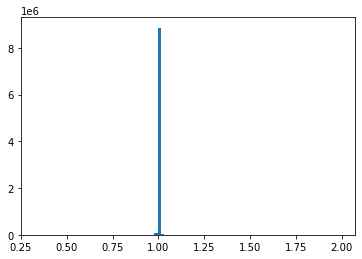

In [33]:
plt.hist(np.ravel(net_A+1), bins=100)
plt.show()

In [34]:
obj1._metric_A.shape, obj1._metric_B.shape

((5, 3000), (5, 3000))

use all the gene pairs for scores:

In [35]:
# u^2 + var
metric_A_temp = (np.square(obj1._metric_A[0]) + obj1._metric_A[1])[:, None] 
metric_B_temp = (np.square(obj1._metric_B[0]) + obj1._metric_B[1])[None, :] 
print(metric_A_temp.shape, metric_B_temp.shape)

w12 = metric_A_temp@metric_B_temp
w12.shape

(3000, 1) (1, 3000)


(3000, 3000)

In [36]:
skin._genes_index_DB

array([[1194,    0],
       [2920,    0],
       [   0,    0],
       ...,
       [   0,    0],
       [   0,    0],
       [   0,    0]])

only fill LR scores that both in DB and expressed:

In [37]:
# ada.var index of LR genes (the intersect of DB and object genes, no pair relationship maintained)
lig_idx = np.ravel(np.asarray(skin._genes_index_DB[:, 0]))
lig_idx = list(np.unique(lig_idx[lig_idx != 0]) - 1)

rec_idx = np.ravel(np.asarray(skin._genes_index_DB[:, 1]))
rec_idx = list(np.unique(rec_idx[rec_idx != 0]) - 1)
len(lig_idx), len(rec_idx)

(204, 230)

In [38]:
# reverse select and zeros LR that not in idx list
mask_lig = np.ones(w12.shape[0], dtype=np.bool)
mask_lig[lig_idx] = 0
mask_rec = np.ones(w12.shape[1], dtype=np.bool)
mask_rec[rec_idx] = 0

w12[mask_lig, :] = 0
w12[:, mask_rec] = 0 
w12
assert np.count_nonzero(w12) == len(lig_idx)*len(rec_idx)

In [39]:
w12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

QC for w12:

In [41]:
(w12.shape[0] * w12.shape[1] - np.count_nonzero(w12)) / (w12.size) #zeros %

0.9947866666666667

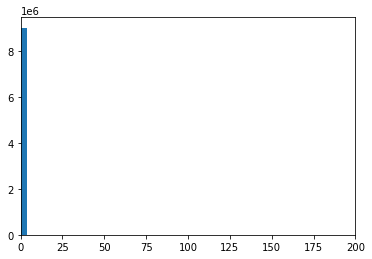

In [42]:
plt.hist(np.ravel(w12), bins=100)
plt.xlim(0,200)
plt.show()

In [ ]:
# w = np.block([[net_A+1, w12],
#             [w12.T, net_B+1]])
# w.shape

#### scale w:

In [43]:
np.mean(net_A+1), np.mean(net_B+1)

(1.000280248061708, 1.0001537102336429)

In [ ]:
#1
num = 0.1 * (np.sum(abs(net_A+1)) + np.sum(abs(net_B+1))) / (len(net_A) + len(net_B))
w12_scale = w12*num
num

In [44]:
#2
mu = 1
w12_scale = mu * ((net_A+1).sum() + (net_B+1).sum()) / (2 * w12.sum()) * w12

In [45]:
np.mean(w12_scale)

1.0002169791476754

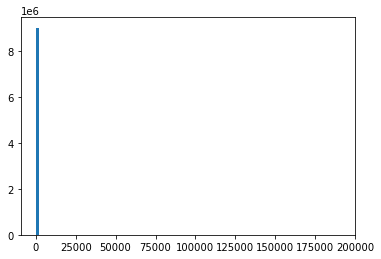

In [46]:
plt.hist(np.ravel(w12_scale), bins=100)
#plt.xlim(0,4000)
plt.show()

In [47]:
w = np.block([[net_A +1, w12_scale],
            [w12_scale.T, net_B +1]])
w.shape

(6000, 6000)

### eigen

In [ ]:
# w_test = np.array([[1, 0, 3, 2], [1, 1, 0, 0], [5, 0, 2, 1], [1, 0, 0, 1]])
# w_test = (w_test + w_test.T)//2
# w_test

In [49]:
def Manifold_Align(w, d = 3):
    
    def is_symmetric(a, rtol=1e-05, atol=1e-08):
        return np.allclose(a, a.T, rtol=rtol, atol=atol)
    
    if not is_symmetric(w):
        raise ValueError('Input should be a symmetric matrix')
    else:
        L = laplacian(w, normed=False)
        U, s, VT = svd(L, full_matrices=True) 
        #print ('U:', U.shape, 's:', s.shape, 'VT:', VT.shape)
        V = VT.T
        V = V[:, s > 1e-4]
        #print('V:', V.shape)
        V = V[:, :d]
    
        return V


In [50]:
np.random.seed(42)

MA = Manifold_Align(w, d=3)
MA.shape

(6000, 3)

In [51]:
def pair_distance(ma, genelist1, genelist2):
    d = {}
    for i, l in enumerate(genelist1):
        for j, r in enumerate(genelist2):
            d[f'{l}_{r}'] = [(i, j), np.linalg.norm(ma[i, :] - ma[len(genelist1) + j, :])]
    
    return d

In [52]:
result_eig = pair_distance(MA, list(ada_A.var_names.astype(str)), list(ada_B.var_names.astype(str)))
len(result_eig)

9000000

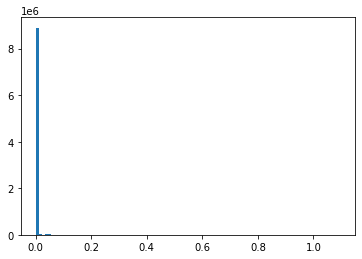

In [53]:
plt.hist(np.asarray(list(result_eig.values()))[:, 1], bins=100)
plt.show()

In [ ]:
#pd.DataFrame.from_dict(result_eig, orient='index').to_csv('distances_eig.csv', header=None)

In [54]:
df_eig = pd.DataFrame.from_dict(result_eig, orient='index', columns=['idx', 'dist']).sort_values(by=['dist'])
df_eig['rank'] = np.arange(len(df_eig))
#df_eig.head()

In [55]:
correspondence_score = [w12[idx] for idx in np.asarray(df_eig['idx'])]
#np.count_nonzero(np.asarray(correspondence_score))
df_eig['correspondence_score'] = correspondence_score
df_eig.head()

,idx,dist,rank,correspondence_score
RGCC_DNAJB1,"(1618, 2381)",0.000002,0,0.0
RGCC_ISG15,"(1618, 678)",0.000002,1,0.0
RGCC_JUN,"(1618, 2681)",0.000002,2,0.0
FOS_DNAJB1,"(2946, 2381)",0.000002,3,0.0
RGCC_HSPA1B,"(1618, 1275)",0.000002,4,0.0


[[1.         0.36820326]
 [0.36820326 1.        ]]


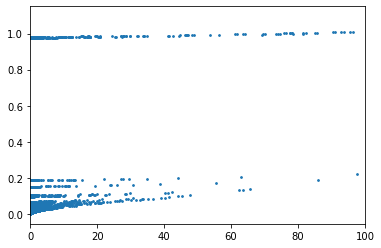

In [56]:
#check corr
select = df_eig['correspondence_score'] != 0
nX = np.asarray(df_eig['correspondence_score'][select])
nY = np.asarray(df_eig['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [57]:
df_eig.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                        0.117232
rank                         8985001
correspondence_score       41.028714
Name: CCL19_CCR7, dtype: object

In [58]:
np.percentile(np.asarray(df_eig['dist']), 95)

0.0002474459995135424

In [90]:
i = 0
for p in candidates:
    if df_eig.loc[p].values[2] > 3000*3000*0.995: # rank > %
        i += 1
        print(p, "idx, dist, rank, score, rank%:", ' '.join(map(str, df_eig.loc[p].values)), f'{100 * round(df_eig.loc[p].values[2]/len(df_eig), 5)}%')
print('\nTotal:', i)

DCN_VEGFA idx, dist, rank, score, rank%: (2992, 825) 0.187971183803094 8990980 8.510590320210872 99.9%
CCL19_CCR6 idx, dist, rank, score, rank%: (2993, 2164) 0.09920167930468454 8981967 2.440694562781364 99.8%
CXCL14_CCR6 idx, dist, rank, score, rank%: (2994, 2164) 0.09705211650552986 8978982 2.400599101370476 99.766%
CCL2_CXCR4 idx, dist, rank, score, rank%: (2820, 2548) 0.05689985514577209 8963969 15.159403618760075 99.6%
CXCL12_CXCR4 idx, dist, rank, score, rank%: (2919, 2548) 0.05964398750054379 8966972 15.959156272693798 99.63300000000001%
CCL19_CXCR4 idx, dist, rank, score, rank%: (2993, 2548) 0.11041841421243358 8984996 28.711082987488208 99.833%
CXCL14_CXCR4 idx, dist, rank, score, rank%: (2994, 2548) 0.10826566404347192 8984992 28.239420478977618 99.833%
CCL2_CCR7 idx, dist, rank, score, rank%: (2820, 2138) 0.0637184203055561 8969973 21.66309221721065 99.666%
CXCL12_CCR7 idx, dist, rank, score, rank%: (2919, 2138) 0.06645912131584165 8972974 22.805954821098645 99.7%
CCL19_CCR7

### NN

In [66]:
x1_np = scipy.sparse.csr_matrix.toarray(ada_A.X.T) #gene by cell
x2_np = scipy.sparse.csr_matrix.toarray(ada_B.X.T)

In [67]:
n = 3000
lr = 0.001

projections, losses = dNN.train_and_project(x1_np, x2_np, w=w, n=n, lr=lr)

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=81, out_features=48, bias=True)
  (linear2): Linear(in_features=48, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=2, bias=True)
)
0 4698.8232421875
1 1258.5430908203125
2 3280.99853515625
3 1150.9150390625
4 896.0999755859375
5 1076.309814453125
6 1219.897216796875
7 1258.310791015625
8 1210.8377685546875
9 1108.96630859375
10 980.7115478515625
11 848.21826171875
12 728.1231689453125
13 631.7950439453125
14 565.5462646484375
15 530.684326171875
16 523.8043212890625
17 537.3529663085938
18 560.75390625
19 582.774169921875
20 594.6634521484375
21 592.600830078125
22 578.0608520507812
23 555.962890625
24 532.0958862304688
25 511.16326904296875
26 495.8074035644531
27 486.7081298828125
28 483.1158142089844
29 483.518127441406

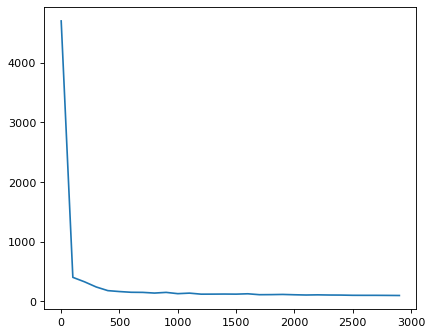

In [68]:
plt.figure(figsize=(6, 5), dpi=80)

plt.plot(np.arange(len(losses))*100, losses)
#plt.savefig('fig.png', dpi=80)
plt.show()

In [69]:
df_proj = pd.DataFrame(projections)

df_proj.index = list(ada_A.var_names) + list(ada_B.var_names)
df_proj.head()

,0,1
FAM89A,-0.005988,0.017735
BCL2L15,-0.006167,0.017355
NABP1,-0.006009,0.017526
SPTBN1,-0.005920,0.017913
SNHG9,-0.006001,0.017614


In [70]:
result_nn = pair_distance(projections, list(ada_A.var_names.astype(str)), list(ada_B.var_names.astype(str)))
len(result_nn)

9000000

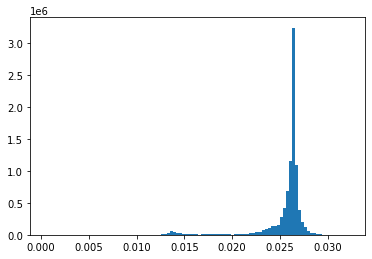

In [71]:
plt.hist(np.asarray(list(result_nn.values()))[:, 1], bins=100)
plt.show()

In [ ]:
#pd.DataFrame.from_dict(result_nn, orient='index').to_csv('distances_nn.csv', header=None)

In [72]:
df_nn = pd.DataFrame.from_dict(result_nn, orient='index', columns=['idx', 'dist']).sort_values(by=['dist'])
df_nn['rank'] = np.arange(len(df_nn))
#df_nn.head(10)

,idx,dist,rank
DCN_HLA-DPB1,"(2992, 2983)",0.000439,0
DCN_HLA-DPA1,"(2992, 2987)",0.000444,1
DCN_CD74,"(2992, 2991)",0.000457,2
COL6A3_HLA-DPB1,"(2819, 2983)",0.000460,3
COL6A3_HLA-DPA1,"(2819, 2987)",0.000466,4
DCN_CD83,"(2992, 1614)",0.000467,5
COL6A3_CD74,"(2819, 2991)",0.000478,6
POSTN_HLA-DPB1,"(2977, 2983)",0.000483,7
COL6A3_CD83,"(2819, 1614)",0.000488,8
POSTN_HLA-DPA1,"(2977, 2987)",0.000488,9


In [73]:
correspondence_score = [w12[idx] for idx in np.asarray(df_nn['idx'])]
#np.count_nonzero(np.asarray(correspondence_score))
df_nn['correspondence_score'] = correspondence_score
df_nn.head()

,idx,dist,rank,correspondence_score
DCN_HLA-DPB1,"(2992, 2983)",0.000439,0,225.837547
DCN_HLA-DPA1,"(2992, 2987)",0.000444,1,227.742715
DCN_CD74,"(2992, 2991)",0.000457,2,379.268906
COL6A3_HLA-DPB1,"(2819, 2983)",0.000460,3,198.497115
COL6A3_HLA-DPA1,"(2819, 2987)",0.000466,4,200.171639


[[ 1.         -0.17686447]
 [-0.17686447  1.        ]]


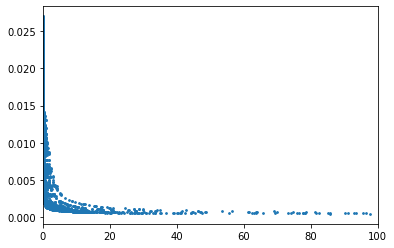

In [74]:
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [80]:
df_nn.loc['CCL19_CCR7'].values[3]

41.0287141932314

In [75]:
df_nn.loc['CCL19_CCR7']

idx                     (2993, 2138)
dist                        0.000548
rank                              30
correspondence_score       41.028714
Name: CCL19_CCR7, dtype: object

In [76]:
np.percentile(np.asarray(df_nn['dist']), 5)

0.021820937748998404

In [95]:
i = 0 
for p in candidates:
    if df_nn.loc[p].values[2] < 200:
        i += 1
        print(p, "idx, dist, rank, score, rank%:", ' '.join(map(str, df_nn.loc[p].values)), f'{100 * round(df_nn.loc[p].values[2]/len(df_nn), 8)}%')

print('\nTotal:', i)

CCL2_CXCR4 idx, dist, rank, score, rank%: (2820, 2548) 0.0006897841230966151 146 15.159403618760075 0.001622%
CXCL12_CXCR4 idx, dist, rank, score, rank%: (2919, 2548) 0.0006837776745669544 142 15.959156272693798 0.0015780000000000002%
CCL19_CXCR4 idx, dist, rank, score, rank%: (2993, 2548) 0.0005793552845716476 50 28.711082987488208 0.000556%
CXCL14_CXCR4 idx, dist, rank, score, rank%: (2994, 2548) 0.0005849227891303599 53 28.239420478977618 0.000589%
CCL2_CCR7 idx, dist, rank, score, rank%: (2820, 2138) 0.0006584888324141502 119 21.66309221721065 0.001322%
CXCL12_CCR7 idx, dist, rank, score, rank%: (2919, 2138) 0.0006521482719108462 115 22.805954821098645 0.001278%
CCL19_CCR7 idx, dist, rank, score, rank%: (2993, 2138) 0.0005477624945342541 30 41.0287141932314 0.00033299999999999996%
CXCL14_CCR7 idx, dist, rank, score, rank%: (2994, 2138) 0.000553401536308229 35 40.35469899618095 0.000389%

Total: 8
